You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:
1. **Pregnancies:** Number of times pregnant (integer)
2. **Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. **BloodPressure:** Diastolic blood pressure (mm Hg) (integer)
4. **SkinThickness:** Triceps skin fold thickness (mm) (integer)
5. **Insulin:** 2-Hour serum insulin (mu U/ml) (integer)
6. **BMI:** Body mass index (weight in kg/(height in m)^2) (float)
7. **DiabetesPedigreeFunction:** Diabetes pedigree function (a function which scores likelihood of diabetes
based on family history) (float)
8. **Age:** Age in years (integer)
9. **Outcome:** Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:

# Question No. 1:
Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
#check for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
#common stats about the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
#check for class imbalance
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### Observations:
1. All of the columns are numerical. Which is good because ML models work better with numerical data.
2. There are no null values in any column, that means the data is complete and there's no need to perform any imputation techniques.
3. Looking at the common statistics about the data, the maximum number of pregnencies for a patient is 17 which looks like it can be an outlier.
4. The dataset is imbalanced. Class 0 has almost double the amount of records than class 1. The performance of the model is expected to be biased towards class 0.

# Question No. 2:
Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
variables into dummy variables if necessary.

<AxesSubplot:>

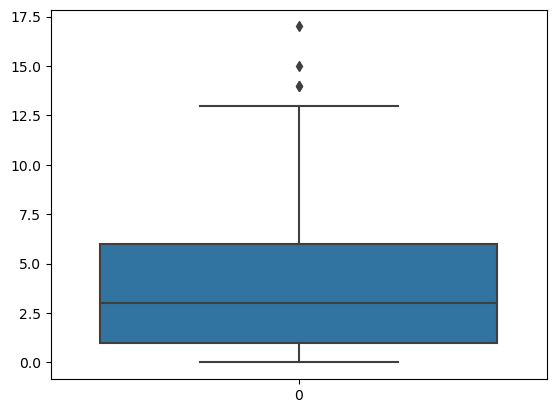

In [6]:
#investigating outlier in the pregnancies column
import seaborn as sns
sns.boxplot(df['Pregnancies'])

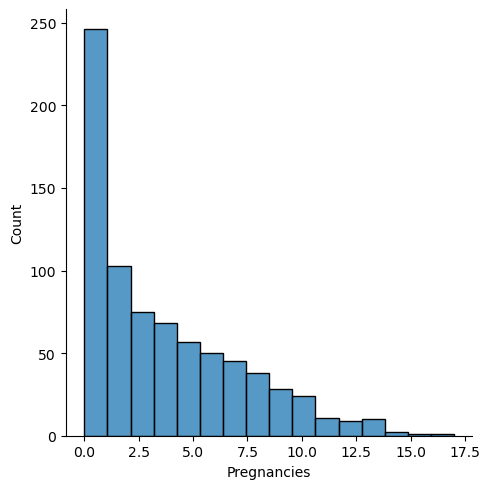

In [7]:
sns.displot(df['Pregnancies'])

In [8]:
#using z_score
from scipy import stats
 
z = np.abs(stats.zscore(df['Pregnancies']))
print(z)

0      0.639947
1      0.844885
2      1.233880
3      0.844885
4      1.141852
         ...   
763    1.827813
764    0.547919
765    0.342981
766    0.844885
767    0.844885
Name: Pregnancies, Length: 768, dtype: float64


In [9]:
#position of the outliers
print(np.where(z>3))

(array([ 88, 159, 298, 455], dtype=int64),)


In [10]:
#dropping the outliers
df.drop(88,inplace=True)
df.drop(159,inplace=True)
df.drop(298,inplace=True)
df.drop(455,inplace=True)

#resetting index
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

# Question No. 3:
Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [12]:
y=df.pop('Outcome')
x=df

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

# Question No. 4:
Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }

clf = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [15]:
best_params=grid_search.best_estimator_
best_params

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=6,
                       max_features='log2', random_state=1024)

In [16]:
clf = DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=9,
                       max_features='auto', random_state=1024)

In [17]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=9,
                       max_features='auto', random_state=1024)

In [18]:
y_pred = clf.predict(x_test)

# Question No. 5:
Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [19]:
#classification report
from sklearn.metrics import classification_report

target_names=['Non_diabetic', 'Diabetic']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

Non_diabetic       0.72      0.92      0.81        51
    Diabetic       0.67      0.31      0.42        26

    accuracy                           0.71        77
   macro avg       0.69      0.61      0.62        77
weighted avg       0.70      0.71      0.68        77



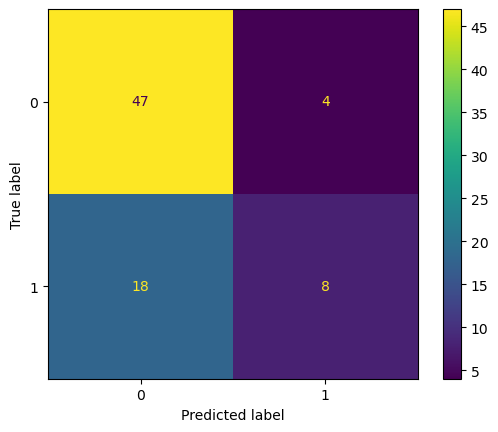

In [20]:
#confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

plt.show()

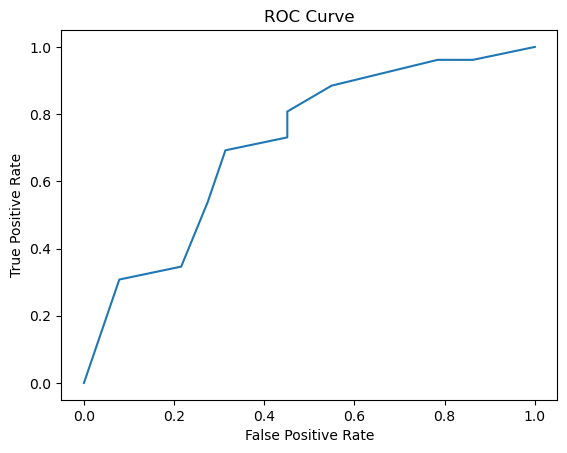

In [21]:
#ROC curve
from sklearn.metrics import roc_curve

y_proba = clf.predict_proba(x_test)[:, 1]  #use the probability of the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

#plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Remarks on the results
As can be seen in the plots, the model is performing very poorly on new data.
1. The classification report gives us the overview of the overall performance of the model. As expected, due to the class imbalance, the recall score of class 1 is very low (which can be confirmed by looking at the confusion matrix as well)
2. The confusion matrix tells us that the model is performing very bad on predicting  class 1 instances (again, because of the imbalance), the performance on class 0 is comparitively better than class 1 but its not good enough to be considered reliable.
3. The ROC curve once again, confirms the fact that the true positive rate of the model is barely good. 

# Question No. 6:
Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.

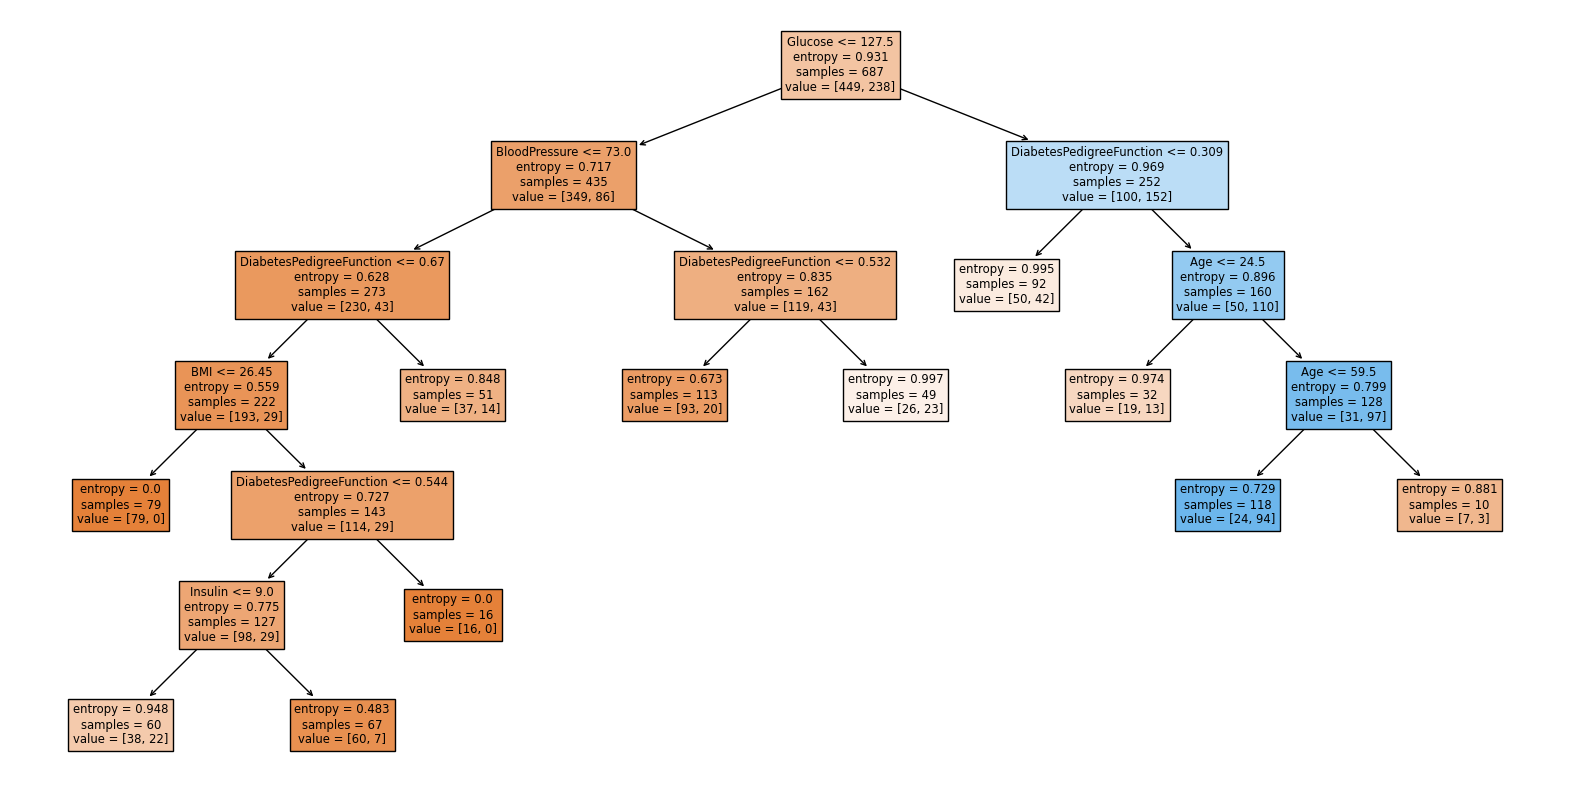

In [22]:
#plotting tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=x_train.columns)
plt.show()

### Interpretation of the tree:
1. The root node of the three is BMI, the tree uses this feature and the threshold 26.35 to further split the data into subsets.
2. Each leaf node corresponds to a final decision or prediction.

In [24]:
importance_scores = clf.feature_importances_
#get the indices of the top 3 most important features
most_important_indices = np.argsort(importance_scores)[::-1][:3] # where n is the number of most important features

#get the names of the most important features
most_important_features = x_train.columns[most_important_indices]

for feature in most_important_features:
    print(feature)

Glucose
DiabetesPedigreeFunction
BMI


- The top feature is Glucose, followed by DiabetesPedigreeFunction and BMI.

# Question No. 7:
Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
risks.

**The model scores and metrics are very bad, so its obvious that the model will perform poorly on new data but I'll still take a couple of samples from the test set to furhter validate it**

In [52]:
couple_of_samples = x_test[1:20]
couple_of_samples

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
259,3,141,0,0,0,30.0,0.761,27
750,8,154,78,32,0,32.4,0.443,45
193,5,158,84,41,210,39.4,0.395,29
333,0,117,0,0,0,33.8,0.932,44
585,0,73,0,0,0,21.1,0.342,25
756,2,88,58,26,16,28.4,0.766,22
137,0,129,80,0,0,31.2,0.703,29
67,2,109,92,0,0,42.7,0.845,54
220,7,119,0,0,0,25.2,0.209,37
210,7,179,95,31,0,34.2,0.164,60


In [53]:
couple_of_true_y = y_test[1:20]
couple_of_true_y

259    1
750    1
193    1
333    0
585    0
756    0
137    0
67     0
220    0
210    0
199    0
428    0
235    1
396    1
66     1
327    0
541    1
569    0
506    1
Name: Outcome, dtype: int64

In [54]:
couple_of_pred_y = clf.predict(couple_of_samples)
couple_of_pred_y

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

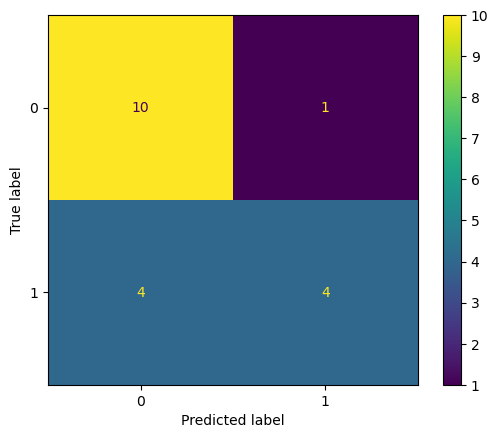

In [55]:
cm = confusion_matrix(couple_of_true_y, couple_of_pred_y, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

plt.show()